In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [8]:
benchandarg="Allreduce iterations=50 count=x"

In [9]:
ECMP_ASP_data = pd.read_csv(f'./RRG_4CPE/{benchandarg}_ECMP_ASP_result.csv')
ugal_data = pd.read_csv(f'./RRG_4CPE/{benchandarg}_ugal_result.csv')
MD_IT_data = pd.read_csv(f'./RRG_4CPE/{benchandarg}_MD_IT_result.csv')
MD_APST4_data = pd.read_csv(f'./RRG_4CPE/{benchandarg}_MD_MP_APST4_result.csv')

### num_samples on the x-axis, speedup on the y-axis, ugal as a reference line

In [10]:
def plot_for_problem_size(nx):
    fig, ax = plt.subplots(figsize=(8, 4)) 

    ECMP_ASP_refernce = 1
    ugal_reference = ugal_data[ugal_data['nx']==nx]['speedup'].values[0]
    ax.axhline(ECMP_ASP_refernce, 0, 130, label="baseline: ECMP_ASP", c="b", linestyle = "--")
    ax.axhline(ugal_reference, 0, 130, label="ugal", c="r", linestyle = "--")

    filtered_data = MD_IT_data[MD_IT_data["nx"] == nx]
    sampling_interval = filtered_data["sampling_interval_us"]
    # num_samples = filtered_data["samples"]
    speedup = filtered_data["speedup"]
    ax.plot(sampling_interval, speedup, label="MD_Nexullance_IT", c="g", linestyle='-', marker='x')

    filtered_data = MD_APST4_data[MD_APST4_data["nx"] == nx]
    sampling_interval = filtered_data["sampling_interval_us"]
    # num_samples = filtered_data["samples"]
    speedup = filtered_data["speedup"]
    ax.plot(sampling_interval, speedup, label="MD_Nexullance_MP_APST4", c="orange", linestyle='-', marker='x')

    # ax.set_ylim(top=2.2)
    ax.set_xlim(xmin=sampling_interval.min() ,xmax=sampling_interval.max())
    # ax.set_xlim(xmin=sampling_interval.min() ,xmax=sampling_interval.max())
    ax.set_xscale("log")
    ax.set_xlabel("sampling interval [us]")
    # ax.set_xlabel("number of samples for MD_Nexullance method")
    ax.set_ylabel("speedup")
    ax.set_title("MPI_Allreduce benchmark (problem size = {})".format(nx))

    for factor in [10.0, 100.0]:
      vline_value = filtered_data["ave_message_lat_us"].values[0]*factor
      print(vline_value)
      ax.axvline(vline_value, ymax=0.7, color="black", linestyle="--") #, label=f"{factor}x ECMP ave lat")
      # ax2.axvline(10*ECMP_ave_lat, 1, ax.get_ylim()[1], color="black", linestyle="--", label="10x ECMP ave lat")
      ax.text(vline_value, 1.1, f"{factor}x \n ECMP_ASP \n ave lat")
      
    # ax.legend()
    ax.invert_xaxis()

    # Secondary x-axis (top)
    ax2 = ax.twiny()  # Create a secondary x-axis
    ax2.set_xscale("log")
    ax2.set_xlim(ax.get_xlim())  # Sync the limits with the primary x-axis
    num_samples = filtered_data["samples"]
    ax2.set_xticks(sampling_interval)
    ax2.set_xticklabels(num_samples)
    ax2.set_xlabel("number of samples $\\nu$")





29.13379839786382
291.3379839786382
53.53197065621545
535.3197065621546
101.23172713945391
1012.317271394539
107.88556100512344
1078.8556100512344


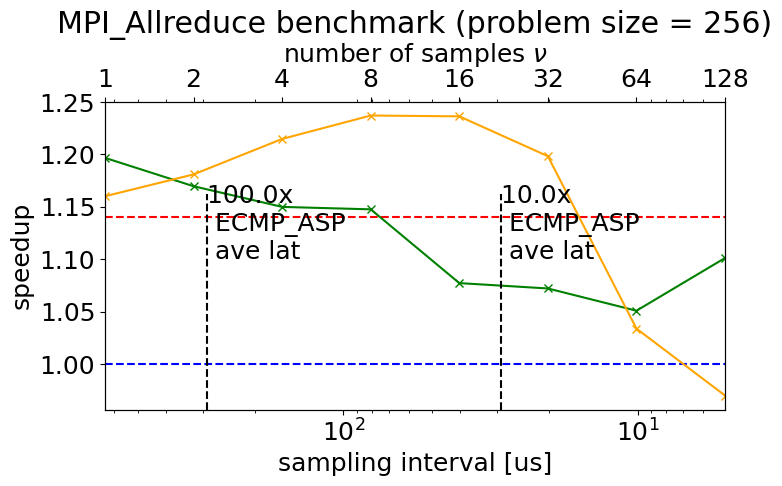

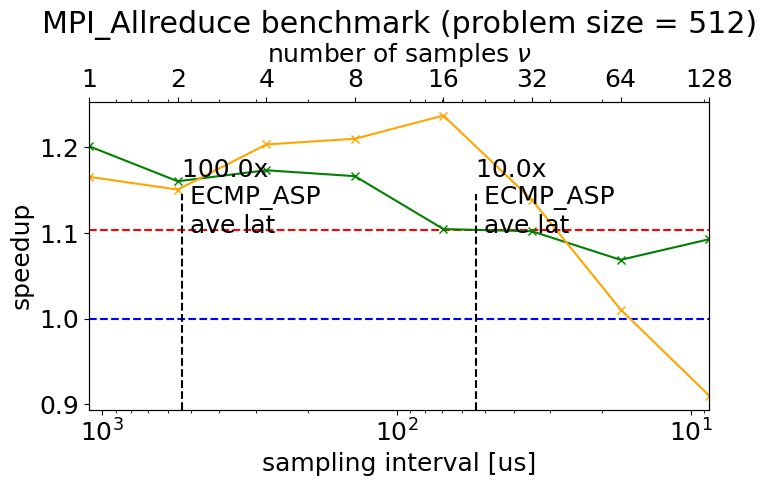

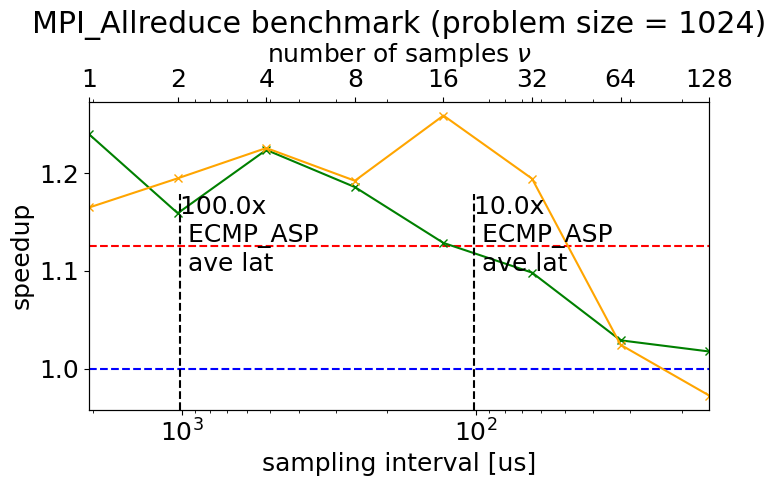

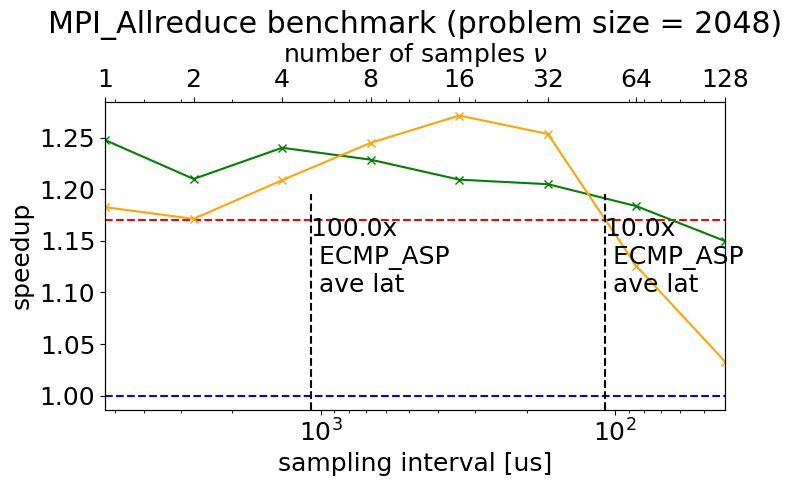

In [11]:
plot_for_problem_size(256)
plot_for_problem_size(512)
plot_for_problem_size(1024)
plot_for_problem_size(2048)

### problemsize on the x-axis, speedup on the y-axis

In [12]:
# # Plot the data
# plt.figure(figsize=(10, 6))

# # plot ECMP_ASP data
# data = pd.read_csv('/users/ziyzhang/EFM_experiments/EFM_experiments/FFT3D nx=ny=nz npRow=12_ECMP_ASP_result.csv')
# # Extract the columns for plotting
# x = data['nx']
# y = data['speedup']
# plt.plot(x, y, marker='o', linestyle='-', color='b', label = "ECMP_ASP")

# # plot ugal data
# data = pd.read_csv('/users/ziyzhang/EFM_experiments/EFM_experiments/FFT3D nx=ny=nz npRow=12_ugal_result.csv')
# # Extract the columns for plotting
# x = data['nx']
# y = data['speedup']
# plt.plot(x, y, marker='o', linestyle='-', color='g', label = "ugal")

# # plot MD_IT data
# data = pd.read_csv('/users/ziyzhang/EFM_experiments/EFM_experiments/FFT3D nx=ny=nz npRow=12_MD_IT_result.csv')
# for num_samples in [2, 8, 32, 128]:
#     filterd_data = data[data["samples"] == f"{num_samples}Sent"]
#     x = filterd_data['nx']
#     y = filterd_data['speedup']
#     plt.plot(x, y, marker='o', linestyle='--', label = f"MD_nexullance_IT {num_samples} samples")

# plt.xlabel('problem size')
# plt.ylabel('Speedup')
# plt.title('FFT3D benchmark on RRG (36,5) network, 1 core per EP')
# plt.legend()
# plt.grid(True)
# plt.show()
